In [1]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen
from IPython.display import Video #For displaying animations
import time
plt.style.use('/Users/tjwilli/jupyter.mplstyle')

In [2]:
def physical_pend(theta0,Q=.1,wd=1,A=1,dt=0.01,num_cycles=10):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin( theta[i-1] )  * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = theta[i-1] + omega[i] * dt
        
        #Keep angle within -pi,pi
        if 1:
            if ( theta[i] < -np.pi ):
                theta[i] += 2 * np.pi
            elif ( theta[i] > np.pi ):
                theta[i] -= 2 * np.pi

    return t,omega,theta

### Chaos

Text(0.5, 1.0, 'Amplitude vs time')

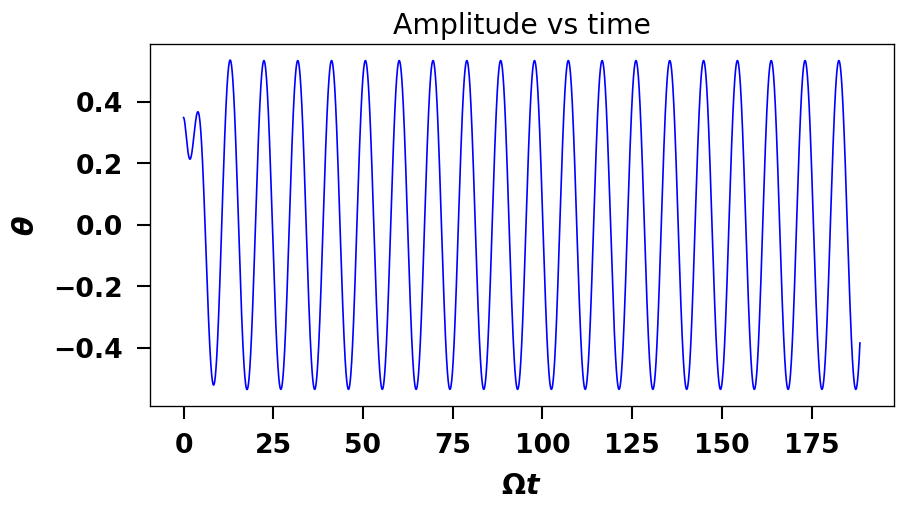

In [7]:
t0 = 20
wd = 2/3
A = .4
Q = 0.1

num_cycles=30
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=num_cycles,dt=0.01)

plt.plot( t,theta,c='blue' )
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$\theta$')
plt.title('Amplitude vs time')
#plt.xlim(200*np.pi*2,220*np.pi*2)

In [5]:
Video("chaotic_pend.mp4")

### Importance of initial conditions

In [8]:
t0 = 20
wd = 2/3
A = .3
Q = 0.1
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)
t,w,theta1 = physical_pend(t0+1,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)

Text(0, 0.5, '$\\theta$')

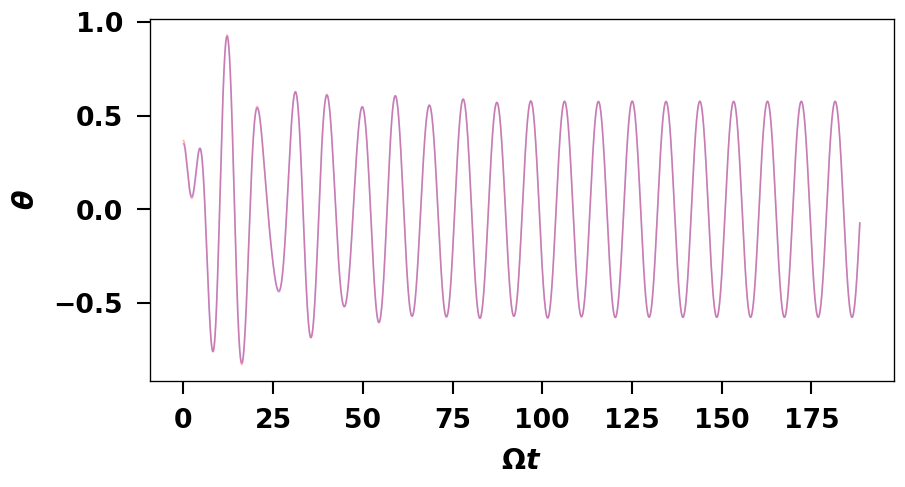

In [9]:
plt.plot(t,theta,c='blue',alpha=.3)
plt.plot(t,theta1,c='red',alpha=.3)
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$\theta$')

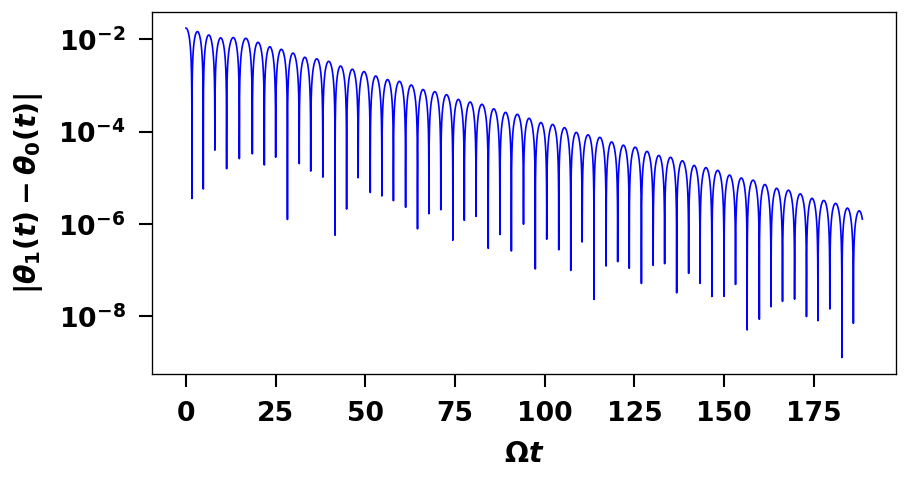

In [10]:
plt.plot(t,np.abs(theta-theta1),c='blue')
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$|\theta_1(t)-\theta_0(t)|$')
plt.yscale('log')

In [11]:
Video( "initial_cond_same.mp4" )

In [12]:
t0 = 20
wd = 2/3
A = 1.3
Q = 0.1
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)
t,w,theta1 = physical_pend(t0+1,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)

Text(0, 0.5, '$\\theta$')

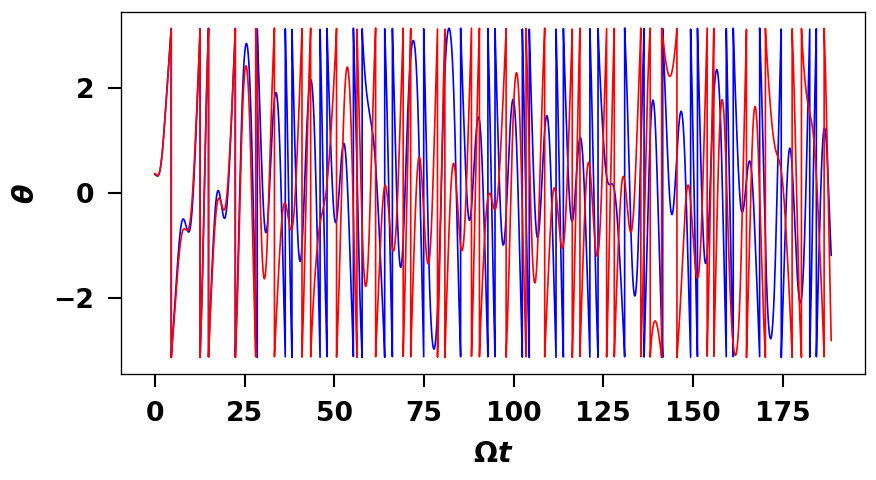

In [13]:
plt.plot(t,theta,c='blue')
plt.plot(t,theta1,c='red')
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$\theta$')

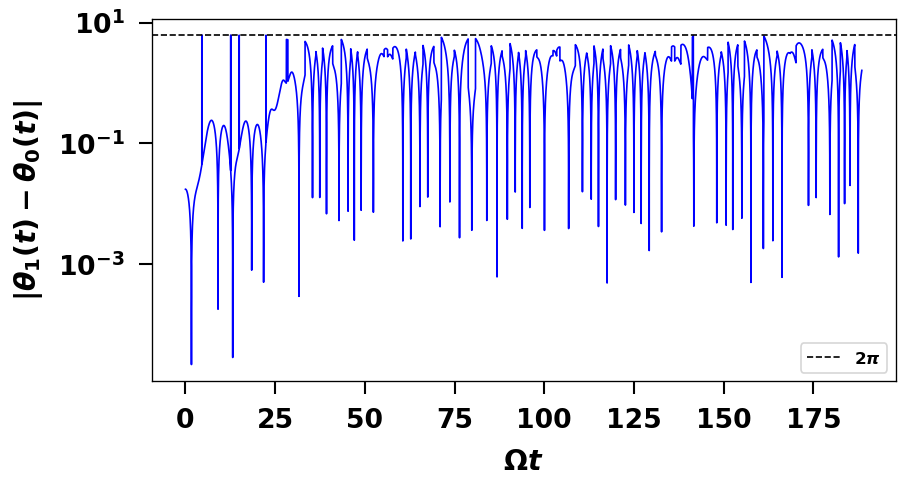

In [14]:
plt.plot(t,np.abs(theta-theta1),c='blue')
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$|\theta_1(t)-\theta_0(t)|$')
plt.yscale('log')
plt.axhline( 2 * np.pi, c='k',ls='--',label=r'$2\pi$' )
plt.legend()

In [15]:
Video( "initial_cond_diverge.mp4" )

Text(0, 0.5, '$\\theta$')

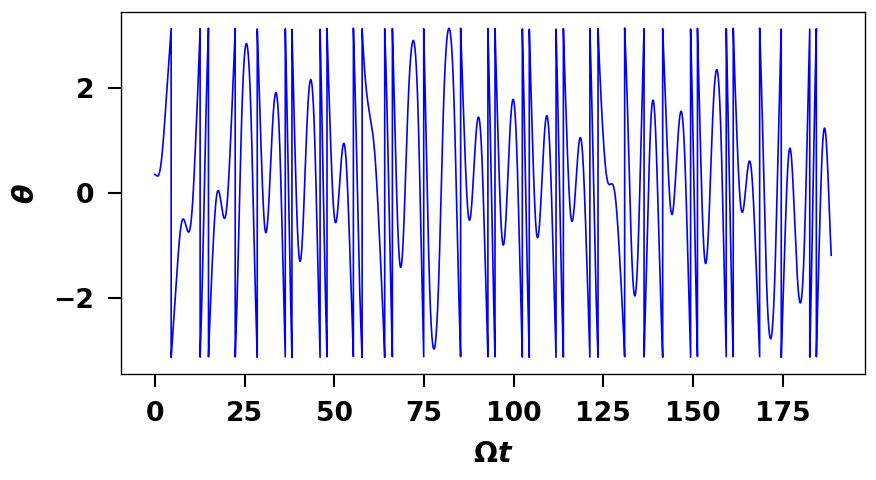

In [16]:
t0 = 20
wd = 2/3
A = 1.3
Q = 0.1
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)
plt.plot(t,theta,c='blue')
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$\theta$')

### Phase space

#### Simple pendulum

In [17]:
Video( "phase_space_simple.mp4" )

#### Damped

In [18]:
Video( "phase_space_damped.mp4" )

#### Physical

In [19]:
Video( "phase_space_driven.mp4" )

In [20]:
Video( "phase_space_chaotic.mp4" )

Text(0, 0.5, '$\\theta$')

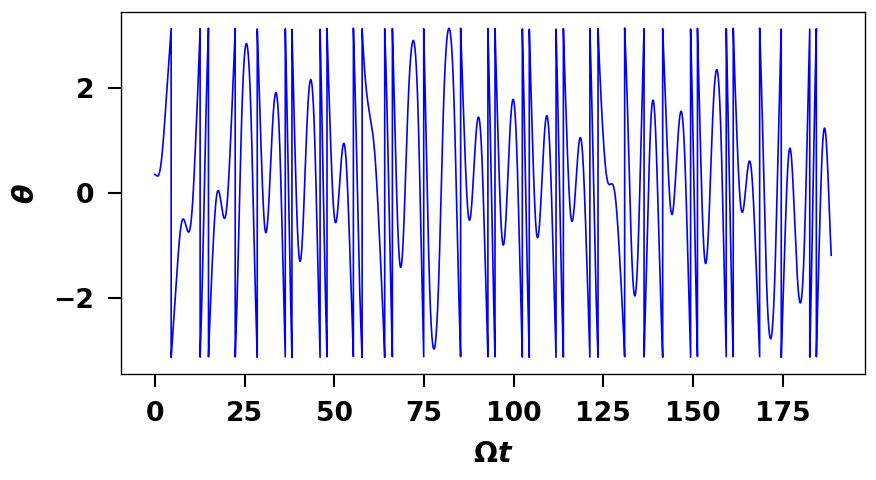

In [21]:
t0 = 20
wd = 2/3
A = 1.3
Q = 0.1
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=30,dt=0.01)
plt.plot(t,theta,c='blue')
plt.xlabel(r'$\Omega t$')
plt.ylabel(r'$\theta$')

# Poincarre

In [3]:
Video( "poincarre_simple.mp4" )

Text(0, 0.5, '$\\theta$')

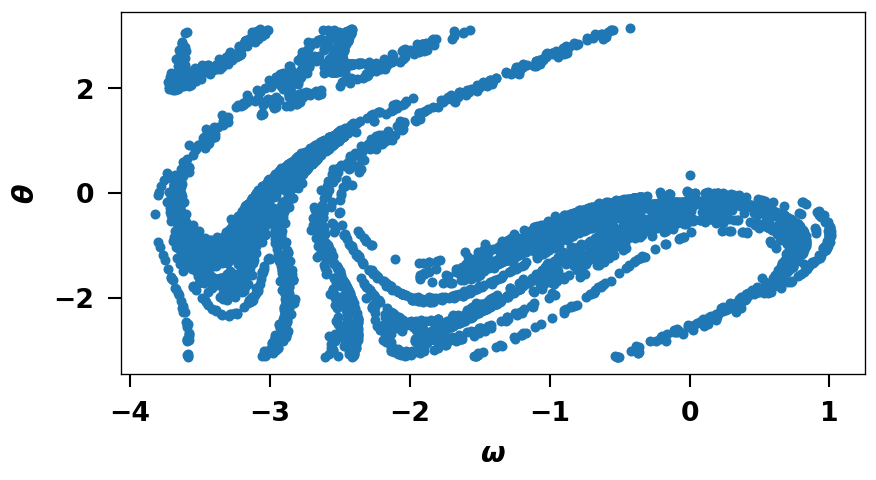

In [23]:
#Input conditions
t0 = 20
wd = 2/3
A = 1.3
Q = 0.1
#Solve numerically
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=10000,dt=0.01)
#Period
T = 2 * np.pi / wd
w_inds = np.where( t%T < 0.01 )
plt.scatter( w[w_inds],theta[w_inds] )
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$\theta$' )

Text(0, 0.5, '$\\theta$')

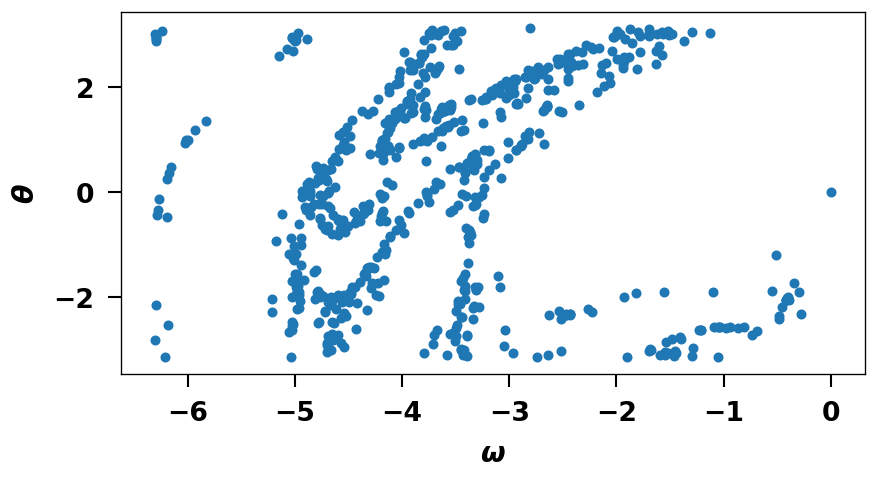

In [5]:
t0 = 0
wd = 2/3
A = 2.5
Q = 0.1

T = 2 * np.pi / wd
t,w,theta = physical_pend(t0,Q=Q,A=A,wd=wd,num_cycles=1000,dt=0.01)

#indices of "t" were t = nT
w_inds = np.where( t%T < 0.01 )
plt.scatter( w[w_inds],theta[w_inds] )
plt.xlabel( r'$\omega$' )
plt.ylabel( r'$\theta$' )

In [ ]:
plt.plot(t,theta)
plt.xlim(0,200)

### Route to chaos: Period doubling

(1256.6370614359173, 1382.300767579509)

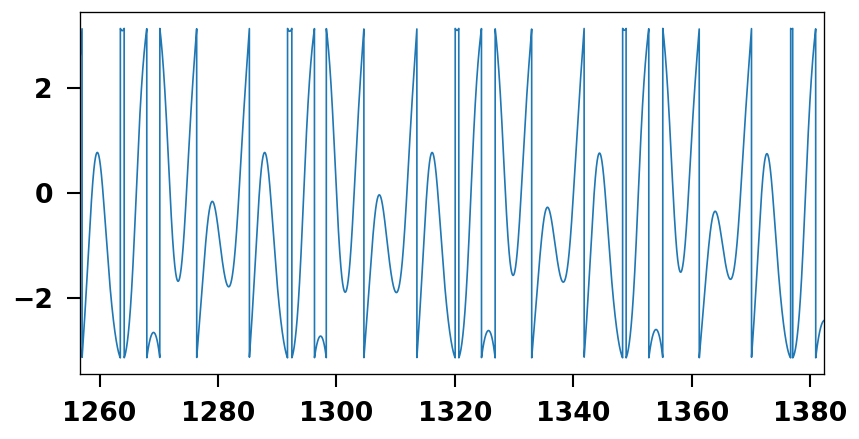

In [29]:
Q = .8
Q = .75 #p2 
Q = .52 #p4
Q = .505 #p8
#Q = .5 #chaos
A = 1.5
wd = 2/3
dt = 1e-2
t,w,theta = physical_pend(0,Q,wd,A,dt,300)

plt.plot(t,theta)
plt.xlim(200*2*np.pi,220*2*np.pi)

### Route to chaos: period doubling

In [ ]:
Q = 1
#Q = .6 #p2
#Q = .51 #p4
Q = .507409 #p8?
A = 1.5
#Q = 0; A = 0
dt = 1e-5
t,omega,theta = physical_pend( 10,wd=2/3,A=A,Q=Q,num_cycles=300)
plt.plot(t,theta)
plt.xlim(220*2*np.pi,240*2*np.pi)
#plt.ylim(2)

In [ ]:
def autocorr(array,offset):
    n = int(offset)
    if n == 0:
        a1 = array
        a2 = array
    else:
        a1 = array[:-n] - array.mean()
        a2 = array[n:] - array.mean()
    return np.dot(a1,a2) / ( array.size - n )

In [ ]:
acorr = [autocorr(theta[nskip:],ioff) for ioff in np.arange(0,t.size,1e-5/dt) ]

In [ ]:
plt.plot(acorr/acorr[0])

In [ ]:
t.size

In [ ]:
1/dt